In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 40000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 20000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../data.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(40000, 3) (40000, 3) (12949, 3) (12949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [9]:
y_train

array([[ 1.39187e-07,  1.11747e-07, -1.86945e-07],
       [ 4.01196e-06,  3.23639e-06, -5.45397e-06],
       [ 2.49581e-05,  2.02810e-05, -3.48000e-05],
       ...,
       [-9.47092e-01,  6.11797e-02, -3.15031e-01],
       [-9.46749e-01,  5.44199e-02, -3.17297e-01],
       [-9.46361e-01,  4.76586e-02, -3.19532e-01]], dtype=float32)

In [10]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.904299 , 0.472788 , 0.346908 ],
       [0.902748 , 0.471081 , 0.340883 ],
       [0.901134 , 0.469546 , 0.334878 ]], dtype=float32)

In [11]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [12]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(40000, 3) dtype=float32>

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [14]:
session.run(tf.global_variables_initializer())

In [15]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [16]:
print (y_true.shape)

(?, 3)


In [17]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true: y_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        #print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        #pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [18]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [19]:
train(N_EPOCHS)
#predict()
#output_layer

Train Accuracy :  0.65369856
Train Accuracy :  0.65305287
Train Accuracy :  0.6524074
Train Accuracy :  0.65176225
Train Accuracy :  0.6511176
Train Accuracy :  0.65047354
Train Accuracy :  0.64983004
Train Accuracy :  0.64918715
Train Accuracy :  0.6485447
Train Accuracy :  0.64790297
Train Accuracy :  0.6472619
Train Accuracy :  0.6466215
Train Accuracy :  0.64598167
Train Accuracy :  0.64534247
Train Accuracy :  0.6447039
Train Accuracy :  0.64406604
Train Accuracy :  0.6434288
Train Accuracy :  0.6427922
Train Accuracy :  0.64215624
Train Accuracy :  0.6415209
Train Accuracy :  0.64088625
Train Accuracy :  0.6402523
Train Accuracy :  0.639619
Train Accuracy :  0.63898635
Train Accuracy :  0.63835436
Train Accuracy :  0.637723
Train Accuracy :  0.6370924
Train Accuracy :  0.63646233
Train Accuracy :  0.6358329
Train Accuracy :  0.6352041
Train Accuracy :  0.6345758
Train Accuracy :  0.63394815
Train Accuracy :  0.633321
Train Accuracy :  0.6326945
Train Accuracy :  0.63206834
Train 

Train Accuracy :  0.47309116
Train Accuracy :  0.47252935
Train Accuracy :  0.47196776
Train Accuracy :  0.4714064
Train Accuracy :  0.47084528
Train Accuracy :  0.4702844
Train Accuracy :  0.46972373
Train Accuracy :  0.46916336
Train Accuracy :  0.4686033
Train Accuracy :  0.46804348
Train Accuracy :  0.46748388
Train Accuracy :  0.46692458
Train Accuracy :  0.4663656
Train Accuracy :  0.46580684
Train Accuracy :  0.46524826
Train Accuracy :  0.46469
Train Accuracy :  0.46413207
Train Accuracy :  0.4635744
Train Accuracy :  0.46301708
Train Accuracy :  0.46246007
Train Accuracy :  0.46190333
Train Accuracy :  0.46134692
Train Accuracy :  0.46079084
Train Accuracy :  0.4602351
Train Accuracy :  0.45967954
Train Accuracy :  0.4591243
Train Accuracy :  0.45856944
Train Accuracy :  0.4580148
Train Accuracy :  0.45746058
Train Accuracy :  0.4569067
Train Accuracy :  0.4563531
Train Accuracy :  0.45579982
Train Accuracy :  0.4552469
Train Accuracy :  0.4546943
Train Accuracy :  0.45414194


Train Accuracy :  0.31944528
Train Accuracy :  0.31904396
Train Accuracy :  0.31864536
Train Accuracy :  0.31824982
Train Accuracy :  0.31785738
Train Accuracy :  0.31746778
Train Accuracy :  0.3170809
Train Accuracy :  0.3166966
Train Accuracy :  0.31631488
Train Accuracy :  0.31593564
Train Accuracy :  0.31555894
Train Accuracy :  0.3151847
Train Accuracy :  0.31481302
Train Accuracy :  0.3144437
Train Accuracy :  0.31407678
Train Accuracy :  0.3137124
Train Accuracy :  0.31335038
Train Accuracy :  0.3129907
Train Accuracy :  0.3126332
Train Accuracy :  0.31227782
Train Accuracy :  0.3119245
Train Accuracy :  0.31157306
Train Accuracy :  0.3112235
Train Accuracy :  0.3108758
Train Accuracy :  0.31052992
Train Accuracy :  0.31018585
Train Accuracy :  0.30984354
Train Accuracy :  0.30950305
Train Accuracy :  0.30916438
Train Accuracy :  0.30882746
Train Accuracy :  0.3084924
Train Accuracy :  0.30815917
Train Accuracy :  0.30782783
Train Accuracy :  0.3074984
Train Accuracy :  0.307170

Train Accuracy :  0.24115355
Train Accuracy :  0.24094675
Train Accuracy :  0.24074002
Train Accuracy :  0.24053325
Train Accuracy :  0.24032652
Train Accuracy :  0.2401198
Train Accuracy :  0.23991309
Train Accuracy :  0.23970634
Train Accuracy :  0.23949957
Train Accuracy :  0.23929279
Train Accuracy :  0.23908597
Train Accuracy :  0.23887913
Train Accuracy :  0.23867226
Train Accuracy :  0.23846526
Train Accuracy :  0.23825821
Train Accuracy :  0.23805112
Train Accuracy :  0.23784386
Train Accuracy :  0.23763657
Train Accuracy :  0.23742917
Train Accuracy :  0.23722163
Train Accuracy :  0.23701404
Train Accuracy :  0.23680632
Train Accuracy :  0.2365985
Train Accuracy :  0.23639058
Train Accuracy :  0.23618254
Train Accuracy :  0.23597442
Train Accuracy :  0.23576617
Train Accuracy :  0.23555781
Train Accuracy :  0.2353494
Train Accuracy :  0.23514089
Train Accuracy :  0.23493223
Train Accuracy :  0.23472346
Train Accuracy :  0.23451461
Train Accuracy :  0.23430564
Train Accuracy : 

Train Accuracy :  0.17222084
Train Accuracy :  0.17197137
Train Accuracy :  0.17172185
Train Accuracy :  0.17147219
Train Accuracy :  0.17122245
Train Accuracy :  0.17097257
Train Accuracy :  0.17072248
Train Accuracy :  0.17047228
Train Accuracy :  0.17022194
Train Accuracy :  0.1699714
Train Accuracy :  0.1697207
Train Accuracy :  0.16946974
Train Accuracy :  0.1692186
Train Accuracy :  0.16896717
Train Accuracy :  0.1687155
Train Accuracy :  0.1684636
Train Accuracy :  0.16821143
Train Accuracy :  0.16795903
Train Accuracy :  0.16770637
Train Accuracy :  0.16745347
Train Accuracy :  0.16720034
Train Accuracy :  0.166947
Train Accuracy :  0.16669345
Train Accuracy :  0.16643964
Train Accuracy :  0.1661856
Train Accuracy :  0.16593133
Train Accuracy :  0.1656768
Train Accuracy :  0.16542205
Train Accuracy :  0.16516699
Train Accuracy :  0.1649116
Train Accuracy :  0.16465594
Train Accuracy :  0.16440001
Train Accuracy :  0.16414383
Train Accuracy :  0.16388743
Train Accuracy :  0.1636

Train Accuracy :  0.09825917
Train Accuracy :  0.09806645
Train Accuracy :  0.09787424
Train Accuracy :  0.097682536
Train Accuracy :  0.09749133
Train Accuracy :  0.097300634
Train Accuracy :  0.09711043
Train Accuracy :  0.09692072
Train Accuracy :  0.09673153
Train Accuracy :  0.096542865
Train Accuracy :  0.0963547
Train Accuracy :  0.09616705
Train Accuracy :  0.0959799
Train Accuracy :  0.09579327
Train Accuracy :  0.09560714
Train Accuracy :  0.09542152
Train Accuracy :  0.095236436
Train Accuracy :  0.09505186
Train Accuracy :  0.0948678
Train Accuracy :  0.09468428
Train Accuracy :  0.09450128
Train Accuracy :  0.09431879
Train Accuracy :  0.094136775
Train Accuracy :  0.09395527
Train Accuracy :  0.09377426
Train Accuracy :  0.09359374
Train Accuracy :  0.093413696
Train Accuracy :  0.093234144
Train Accuracy :  0.09305507
Train Accuracy :  0.09287648
Train Accuracy :  0.09269838
Train Accuracy :  0.092520766
Train Accuracy :  0.09234363
Train Accuracy :  0.09216698
Train Acc

Train Accuracy :  0.057162747
Train Accuracy :  0.057065483
Train Accuracy :  0.056968346
Train Accuracy :  0.056871317
Train Accuracy :  0.056774434
Train Accuracy :  0.056677673
Train Accuracy :  0.056581054
Train Accuracy :  0.05648457
Train Accuracy :  0.056388233
Train Accuracy :  0.05629204
Train Accuracy :  0.05619598
Train Accuracy :  0.05610006
Train Accuracy :  0.05600428
Train Accuracy :  0.055908628
Train Accuracy :  0.05581311
Train Accuracy :  0.055717718
Train Accuracy :  0.055622444
Train Accuracy :  0.055527303
Train Accuracy :  0.05543231
Train Accuracy :  0.05533743
Train Accuracy :  0.05524269
Train Accuracy :  0.055148087
Train Accuracy :  0.055053607
Train Accuracy :  0.054959252
Train Accuracy :  0.054865018
Train Accuracy :  0.054770913
Train Accuracy :  0.05467695
Train Accuracy :  0.05458314
Train Accuracy :  0.054489464
Train Accuracy :  0.054395903
Train Accuracy :  0.054302465
Train Accuracy :  0.054209158
Train Accuracy :  0.05411597
Train Accuracy :  0.05

Train Accuracy :  0.033665024
Train Accuracy :  0.033591412
Train Accuracy :  0.03351785
Train Accuracy :  0.03344435
Train Accuracy :  0.033370886
Train Accuracy :  0.03329748
Train Accuracy :  0.03322413
Train Accuracy :  0.033150837
Train Accuracy :  0.033077583
Train Accuracy :  0.03300438
Train Accuracy :  0.03293126
Train Accuracy :  0.032858223
Train Accuracy :  0.03278524
Train Accuracy :  0.032712344
Train Accuracy :  0.032639526
Train Accuracy :  0.032566786
Train Accuracy :  0.03249411
Train Accuracy :  0.032421507
Train Accuracy :  0.03234897
Train Accuracy :  0.032276526
Train Accuracy :  0.032204155
Train Accuracy :  0.03213187
Train Accuracy :  0.032059677
Train Accuracy :  0.031987578
Train Accuracy :  0.031915557
Train Accuracy :  0.031843625
Train Accuracy :  0.031771794
Train Accuracy :  0.03170004
Train Accuracy :  0.031628374
Train Accuracy :  0.03155676
Train Accuracy :  0.03148521
Train Accuracy :  0.031413734
Train Accuracy :  0.03134233
Train Accuracy :  0.0312

Train Accuracy :  0.015996149
Train Accuracy :  0.015945707
Train Accuracy :  0.015895389
Train Accuracy :  0.015845193
Train Accuracy :  0.015795104
Train Accuracy :  0.015745135
Train Accuracy :  0.015695278
Train Accuracy :  0.015645547
Train Accuracy :  0.015595932
Train Accuracy :  0.015546441
Train Accuracy :  0.01549708
Train Accuracy :  0.015447836
Train Accuracy :  0.015398722
Train Accuracy :  0.015349727
Train Accuracy :  0.015300871
Train Accuracy :  0.015252131
Train Accuracy :  0.015203532
Train Accuracy :  0.015155069
Train Accuracy :  0.015106739
Train Accuracy :  0.015058535
Train Accuracy :  0.015010465
Train Accuracy :  0.014962536
Train Accuracy :  0.014914733
Train Accuracy :  0.014867069
Train Accuracy :  0.014819546
Train Accuracy :  0.014772153
Train Accuracy :  0.014724871
Train Accuracy :  0.014677721
Train Accuracy :  0.014630697
Train Accuracy :  0.01458379
Train Accuracy :  0.014536993
Train Accuracy :  0.014490306
Train Accuracy :  0.01444374
Train Accurac

Train Accuracy :  0.0065071215
Train Accuracy :  0.006485954
Train Accuracy :  0.0064648376
Train Accuracy :  0.0064437757
Train Accuracy :  0.0064227744
Train Accuracy :  0.0064018397
Train Accuracy :  0.0063809473
Train Accuracy :  0.006360115
Train Accuracy :  0.0063393526
Train Accuracy :  0.0063186437
Train Accuracy :  0.006297985
Train Accuracy :  0.0062773926
Train Accuracy :  0.0062568616
Train Accuracy :  0.006236386
Train Accuracy :  0.006215962
Train Accuracy :  0.0061955894
Train Accuracy :  0.006175295
Train Accuracy :  0.006155064
Train Accuracy :  0.0061348854
Train Accuracy :  0.0061147506
Train Accuracy :  0.0060946713
Train Accuracy :  0.006074654
Train Accuracy :  0.0060546827
Train Accuracy :  0.006034765
Train Accuracy :  0.006014902
Train Accuracy :  0.005995081
Train Accuracy :  0.005975311
Train Accuracy :  0.0059555797
Train Accuracy :  0.0059358994
Train Accuracy :  0.0059162597
Train Accuracy :  0.005896644
Train Accuracy :  0.0058770734
Train Accuracy :  0.0

Train Accuracy :  0.0022587148
Train Accuracy :  0.0022481927
Train Accuracy :  0.0022377053
Train Accuracy :  0.00222725
Train Accuracy :  0.0022168355
Train Accuracy :  0.0022064617
Train Accuracy :  0.0021961182
Train Accuracy :  0.0021858078
Train Accuracy :  0.0021754927
Train Accuracy :  0.002165197
Train Accuracy :  0.002154949
Train Accuracy :  0.0021447162
Train Accuracy :  0.0021345152
Train Accuracy :  0.0021243333
Train Accuracy :  0.0021141737
Train Accuracy :  0.002104049
Train Accuracy :  0.002093949
Train Accuracy :  0.0020838827
Train Accuracy :  0.0020738493
Train Accuracy :  0.0020638437
Train Accuracy :  0.0020538608
Train Accuracy :  0.0020439138
Train Accuracy :  0.002033991
Train Accuracy :  0.0020240955
Train Accuracy :  0.002014228
Train Accuracy :  0.0020043887
Train Accuracy :  0.0019945716
Train Accuracy :  0.0019847755
Train Accuracy :  0.0019749983
Train Accuracy :  0.0019652536
Train Accuracy :  0.001955552
Train Accuracy :  0.0019458913
Train Accuracy : 

Train Accuracy :  0.00063718023
Train Accuracy :  0.00062968343
Train Accuracy :  0.00061403494
Train Accuracy :  0.00059233204
Train Accuracy :  0.00057451404
Train Accuracy :  0.00056513894
Train Accuracy :  0.0005660928
Train Accuracy :  0.0005825126
Train Accuracy :  0.0006170633
Train Accuracy :  0.0006386286
Train Accuracy :  0.0006112101
Train Accuracy :  0.00057310937
Train Accuracy :  0.0005531206
Train Accuracy :  0.000547802
Train Accuracy :  0.0005528322
Train Accuracy :  0.0005683505
Train Accuracy :  0.0005892144
Train Accuracy :  0.0005959152
Train Accuracy :  0.000580762
Train Accuracy :  0.00056342944
Train Accuracy :  0.0005572464
Train Accuracy :  0.00055935216
Train Accuracy :  0.00055963435
Train Accuracy :  0.00055125484
Train Accuracy :  0.00053921895
Train Accuracy :  0.0005336788
Train Accuracy :  0.00054175645
Train Accuracy :  0.0005629495
Train Accuracy :  0.00057564536
Train Accuracy :  0.00055671483
Train Accuracy :  0.00052755815
Train Accuracy :  0.00050

Train Accuracy :  0.0002437741
Train Accuracy :  0.00024206749
Train Accuracy :  0.0002405853
Train Accuracy :  0.00023923336
Train Accuracy :  0.00023842728
Train Accuracy :  0.00023858111
Train Accuracy :  0.00023965731
Train Accuracy :  0.00024113493
Train Accuracy :  0.00024229973
Train Accuracy :  0.00024214722
Train Accuracy :  0.00024041646
Train Accuracy :  0.00023791184
Train Accuracy :  0.00023594535
Train Accuracy :  0.0002348048
Train Accuracy :  0.00023416673
Train Accuracy :  0.00023388522
Train Accuracy :  0.00023416187
Train Accuracy :  0.00023490834
Train Accuracy :  0.0002356571
Train Accuracy :  0.00023591326
Train Accuracy :  0.00023576716
Train Accuracy :  0.00023488906
Train Accuracy :  0.00023327004
Train Accuracy :  0.00023139421
Train Accuracy :  0.00022989542
Train Accuracy :  0.00022897859
Train Accuracy :  0.00022867744
Train Accuracy :  0.000228907
Train Accuracy :  0.00022964022
Train Accuracy :  0.00023062211
Train Accuracy :  0.00023137077
Train Accuracy

Train Accuracy :  0.00016162371
Train Accuracy :  0.00016156341
Train Accuracy :  0.00016182887
Train Accuracy :  0.00016215035
Train Accuracy :  0.00016274468
Train Accuracy :  0.000163089
Train Accuracy :  0.00016276458
Train Accuracy :  0.00016209966
Train Accuracy :  0.00016146999
Train Accuracy :  0.00016069342
Train Accuracy :  0.00016011685
Train Accuracy :  0.00015989583
Train Accuracy :  0.00015977575
Train Accuracy :  0.00015962849
Train Accuracy :  0.00015978306
Train Accuracy :  0.00015990587
Train Accuracy :  0.0001599276
Train Accuracy :  0.00016004907
Train Accuracy :  0.00016027568
Train Accuracy :  0.00016000122
Train Accuracy :  0.00015989854
Train Accuracy :  0.00015958786
Train Accuracy :  0.00015892
Train Accuracy :  0.00015840416
Train Accuracy :  0.00015805982
Train Accuracy :  0.00015760143
Train Accuracy :  0.00015740296
Train Accuracy :  0.0001573935
Train Accuracy :  0.00015737776
Train Accuracy :  0.0001575264
Train Accuracy :  0.00015791829
Train Accuracy :

Train Accuracy :  0.00013057154
Train Accuracy :  0.00013024332
Train Accuracy :  0.000130083
Train Accuracy :  0.00012987548
Train Accuracy :  0.00012980583
Train Accuracy :  0.00012987517
Train Accuracy :  0.00012984888
Train Accuracy :  0.00012995601
Train Accuracy :  0.0001302241
Train Accuracy :  0.0001302672
Train Accuracy :  0.00013039914
Train Accuracy :  0.00013048346
Train Accuracy :  0.00013020256
Train Accuracy :  0.00013004828
Train Accuracy :  0.0001298076
Train Accuracy :  0.00012935502
Train Accuracy :  0.0001291784
Train Accuracy :  0.00012888674
Train Accuracy :  0.00012867601
Train Accuracy :  0.00012866834
Train Accuracy :  0.00012850434
Train Accuracy :  0.00012840245
Train Accuracy :  0.00012865306
Train Accuracy :  0.00012854293
Train Accuracy :  0.00012862176
Train Accuracy :  0.00012881514
Train Accuracy :  0.00012874092
Train Accuracy :  0.0001287875
Train Accuracy :  0.00012883982
Train Accuracy :  0.00012866159
Train Accuracy :  0.00012857757
Train Accuracy 

Train Accuracy :  0.00011222547
Train Accuracy :  0.00011210824
Train Accuracy :  0.00011201192
Train Accuracy :  0.00011206544
Train Accuracy :  0.000111995534
Train Accuracy :  0.0001121652
Train Accuracy :  0.00011225029
Train Accuracy :  0.00011235893
Train Accuracy :  0.000112504546
Train Accuracy :  0.00011245306
Train Accuracy :  0.0001123801
Train Accuracy :  0.000112232185
Train Accuracy :  0.00011197743
Train Accuracy :  0.00011187317
Train Accuracy :  0.00011165133
Train Accuracy :  0.00011151026
Train Accuracy :  0.00011138171
Train Accuracy :  0.00011137351
Train Accuracy :  0.00011127001
Train Accuracy :  0.000111230445
Train Accuracy :  0.000111222966
Train Accuracy :  0.000111260255
Train Accuracy :  0.00011124827
Train Accuracy :  0.00011130608
Train Accuracy :  0.000111335015
Train Accuracy :  0.000111446934
Train Accuracy :  0.00011140091
Train Accuracy :  0.00011142001
Train Accuracy :  0.00011140796
Train Accuracy :  0.00011128035
Train Accuracy :  0.00011117501
Tr

Train Accuracy :  0.00010176427
Train Accuracy :  0.00010161102
Train Accuracy :  0.00010146924
Train Accuracy :  0.000101338504
Train Accuracy :  0.00010117993
Train Accuracy :  0.00010107351
Train Accuracy :  0.00010097104
Train Accuracy :  0.00010087652
Train Accuracy :  0.00010094289
Train Accuracy :  0.00010084312
Train Accuracy :  0.00010100903
Train Accuracy :  0.00010105274
Train Accuracy :  0.00010121625
Train Accuracy :  0.000101284306
Train Accuracy :  0.00010141898
Train Accuracy :  0.00010134209
Train Accuracy :  0.000101371326
Train Accuracy :  0.00010117001
Train Accuracy :  0.00010111876
Train Accuracy :  0.000100826765
Train Accuracy :  0.00010081562
Train Accuracy :  0.00010064045
Train Accuracy :  0.000100587284
Train Accuracy :  0.000100581354
Train Accuracy :  0.00010048206
Train Accuracy :  0.000100534846
Train Accuracy :  0.00010041262
Train Accuracy :  0.00010052163
Train Accuracy :  0.00010050181
Train Accuracy :  0.000100510115
Train Accuracy :  0.00010069811


Train Accuracy :  9.42129e-05
Train Accuracy :  9.421239e-05
Train Accuracy :  9.402218e-05
Train Accuracy :  9.3975344e-05
Train Accuracy :  9.384135e-05
Train Accuracy :  9.3846436e-05
Train Accuracy :  9.374361e-05
Train Accuracy :  9.3822906e-05
Train Accuracy :  9.380797e-05
Train Accuracy :  9.387355e-05
Train Accuracy :  9.39074e-05
Train Accuracy :  9.4015864e-05
Train Accuracy :  9.396485e-05
Train Accuracy :  9.417457e-05
Train Accuracy :  9.407601e-05
Train Accuracy :  9.421413e-05
Train Accuracy :  9.412612e-05
Train Accuracy :  9.414792e-05
Train Accuracy :  9.406044e-05
Train Accuracy :  9.4033574e-05
Train Accuracy :  9.390768e-05
Train Accuracy :  9.389232e-05
Train Accuracy :  9.372947e-05
Train Accuracy :  9.366907e-05
Train Accuracy :  9.354418e-05
Train Accuracy :  9.3436414e-05
Train Accuracy :  9.341457e-05
Train Accuracy :  9.329269e-05
Train Accuracy :  9.340265e-05
Train Accuracy :  9.331375e-05
Train Accuracy :  9.3475304e-05
Train Accuracy :  9.356038e-05
Tra

Train Accuracy :  8.946872e-05
Train Accuracy :  8.9553265e-05
Train Accuracy :  8.95924e-05
Train Accuracy :  8.9558795e-05
Train Accuracy :  8.952051e-05
Train Accuracy :  8.94237e-05
Train Accuracy :  8.940696e-05
Train Accuracy :  8.9232286e-05
Train Accuracy :  8.926238e-05
Train Accuracy :  8.906412e-05
Train Accuracy :  8.9116715e-05
Train Accuracy :  8.895571e-05
Train Accuracy :  8.901569e-05
Train Accuracy :  8.887157e-05
Train Accuracy :  8.891373e-05
Train Accuracy :  8.8883426e-05
Train Accuracy :  8.888173e-05
Train Accuracy :  8.889989e-05
Train Accuracy :  8.8955916e-05
Train Accuracy :  8.893678e-05
Train Accuracy :  8.901917e-05
Train Accuracy :  8.9039306e-05
Train Accuracy :  8.914937e-05
Train Accuracy :  8.911332e-05
Train Accuracy :  8.918594e-05
Train Accuracy :  8.91514e-05
Train Accuracy :  8.921034e-05
Train Accuracy :  8.913486e-05
Train Accuracy :  8.9124434e-05
Train Accuracy :  8.905433e-05
Train Accuracy :  8.895922e-05
Train Accuracy :  8.893703e-05
Tra

Train Accuracy :  8.610812e-05
Train Accuracy :  8.607209e-05
Train Accuracy :  8.6202985e-05
Train Accuracy :  8.6183536e-05
Train Accuracy :  8.621849e-05
Train Accuracy :  8.602917e-05
Train Accuracy :  8.614047e-05
Train Accuracy :  8.5851956e-05
Train Accuracy :  8.599966e-05
Train Accuracy :  8.5711465e-05
Train Accuracy :  8.589724e-05
Train Accuracy :  8.567469e-05
Train Accuracy :  8.580746e-05
Train Accuracy :  8.56967e-05
Train Accuracy :  8.572924e-05
Train Accuracy :  8.572327e-05
Train Accuracy :  8.571957e-05
Train Accuracy :  8.5779684e-05
Train Accuracy :  8.5674634e-05
Train Accuracy :  8.582327e-05
Train Accuracy :  8.574995e-05
Train Accuracy :  8.590657e-05
Train Accuracy :  8.5811014e-05
Train Accuracy :  8.5948624e-05
Train Accuracy :  8.5865235e-05
Train Accuracy :  8.5947475e-05
Train Accuracy :  8.585114e-05
Train Accuracy :  8.5817715e-05
Train Accuracy :  8.576973e-05
Train Accuracy :  8.5647574e-05
Train Accuracy :  8.5715605e-05
Train Accuracy :  8.551456e

Train Accuracy :  8.3606705e-05
Train Accuracy :  8.4104155e-05
Train Accuracy :  8.3607316e-05
Train Accuracy :  8.403909e-05
Train Accuracy :  8.361088e-05
Train Accuracy :  8.388299e-05
Train Accuracy :  8.35645e-05
Train Accuracy :  8.3779436e-05
Train Accuracy :  8.351439e-05
Train Accuracy :  8.3604275e-05
Train Accuracy :  8.345034e-05
Train Accuracy :  8.3453364e-05
Train Accuracy :  8.336873e-05
Train Accuracy :  8.33539e-05
Train Accuracy :  8.336785e-05
Train Accuracy :  8.328941e-05
Train Accuracy :  8.341971e-05
Train Accuracy :  8.336774e-05
Train Accuracy :  8.359421e-05
Train Accuracy :  8.351983e-05
Train Accuracy :  8.3772386e-05
Train Accuracy :  8.364071e-05
Train Accuracy :  8.386119e-05
Train Accuracy :  8.3651175e-05
Train Accuracy :  8.382406e-05
Train Accuracy :  8.359043e-05
Train Accuracy :  8.3672814e-05
Train Accuracy :  8.3487656e-05
Train Accuracy :  8.355832e-05
Train Accuracy :  8.340227e-05
Train Accuracy :  8.345197e-05
Train Accuracy :  8.336203e-05


Train Accuracy :  8.213501e-05
Train Accuracy :  8.201834e-05
Train Accuracy :  8.2202496e-05
Train Accuracy :  8.196741e-05
Train Accuracy :  8.220078e-05
Train Accuracy :  8.189425e-05
Train Accuracy :  8.213806e-05
Train Accuracy :  8.182302e-05
Train Accuracy :  8.1972496e-05
Train Accuracy :  8.1770035e-05
Train Accuracy :  8.1832266e-05
Train Accuracy :  8.170209e-05
Train Accuracy :  8.1732454e-05
Train Accuracy :  8.1639126e-05
Train Accuracy :  8.16475e-05
Train Accuracy :  8.165877e-05
Train Accuracy :  8.161672e-05
Train Accuracy :  8.172814e-05
Train Accuracy :  8.1630045e-05
Train Accuracy :  8.185582e-05
Train Accuracy :  8.169759e-05
Train Accuracy :  8.2098515e-05
Train Accuracy :  8.1799335e-05
Train Accuracy :  8.223706e-05
Train Accuracy :  8.1911465e-05
Train Accuracy :  8.2315724e-05
Train Accuracy :  8.192914e-05
Train Accuracy :  8.228598e-05
Train Accuracy :  8.186272e-05
Train Accuracy :  8.217474e-05
Train Accuracy :  8.169616e-05
Train Accuracy :  8.203201e-0

Train Accuracy :  8.076332e-05
Train Accuracy :  8.060606e-05
Train Accuracy :  8.087532e-05
Train Accuracy :  8.07664e-05
Train Accuracy :  8.097258e-05
Train Accuracy :  8.08162e-05
Train Accuracy :  8.097235e-05
Train Accuracy :  8.081777e-05
Train Accuracy :  8.088313e-05
Train Accuracy :  8.075315e-05
Train Accuracy :  8.083832e-05
Train Accuracy :  8.066442e-05
Train Accuracy :  8.0772006e-05
Train Accuracy :  8.063295e-05
Train Accuracy :  8.078514e-05
Train Accuracy :  8.056155e-05
Train Accuracy :  8.075155e-05
Train Accuracy :  8.047999e-05
Train Accuracy :  8.0698774e-05
Train Accuracy :  8.048067e-05
Train Accuracy :  8.066065e-05
Train Accuracy :  8.0484875e-05
Train Accuracy :  8.067774e-05
Train Accuracy :  8.05672e-05
Train Accuracy :  8.075814e-05
Train Accuracy :  8.066136e-05
Train Accuracy :  8.0794845e-05
Train Accuracy :  8.072828e-05
Train Accuracy :  8.081252e-05
Train Accuracy :  8.072324e-05
Train Accuracy :  8.0739264e-05
Train Accuracy :  8.066062e-05
Train 

Train Accuracy :  8.0092104e-05
Train Accuracy :  7.984679e-05
Train Accuracy :  7.987311e-05
Train Accuracy :  7.968849e-05
Train Accuracy :  7.973016e-05
Train Accuracy :  7.960128e-05
Train Accuracy :  7.9652644e-05
Train Accuracy :  7.959096e-05
Train Accuracy :  7.964374e-05
Train Accuracy :  7.961808e-05
Train Accuracy :  7.974087e-05
Train Accuracy :  7.9780984e-05
Train Accuracy :  7.987169e-05
Train Accuracy :  7.9943435e-05
Train Accuracy :  7.98919e-05
Train Accuracy :  8.001171e-05
Train Accuracy :  7.9912286e-05
Train Accuracy :  7.999135e-05
Train Accuracy :  7.986107e-05
Train Accuracy :  7.990844e-05
Train Accuracy :  7.979728e-05
Train Accuracy :  7.9862584e-05
Train Accuracy :  7.977283e-05
Train Accuracy :  7.980791e-05
Train Accuracy :  7.975099e-05
Train Accuracy :  7.976591e-05
Train Accuracy :  7.9718775e-05
Train Accuracy :  7.968986e-05
Train Accuracy :  7.966719e-05
Train Accuracy :  7.9641344e-05
Train Accuracy :  7.969944e-05
Train Accuracy :  7.9632846e-05


Train Accuracy :  7.92291e-05
Train Accuracy :  7.904806e-05
Train Accuracy :  7.94885e-05
Train Accuracy :  7.923116e-05
Train Accuracy :  7.969529e-05
Train Accuracy :  7.936705e-05
Train Accuracy :  7.983648e-05
Train Accuracy :  7.9311554e-05
Train Accuracy :  7.972765e-05
Train Accuracy :  7.9108526e-05
Train Accuracy :  7.9532816e-05
Train Accuracy :  7.886938e-05
Train Accuracy :  7.930905e-05
Train Accuracy :  7.87176e-05
Train Accuracy :  7.915411e-05
Train Accuracy :  7.869911e-05
Train Accuracy :  7.912095e-05
Train Accuracy :  7.8817655e-05
Train Accuracy :  7.9154386e-05
Train Accuracy :  7.899257e-05
Train Accuracy :  7.915961e-05
Train Accuracy :  7.919371e-05
Train Accuracy :  7.922974e-05
Train Accuracy :  7.925246e-05
Train Accuracy :  7.9221805e-05
Train Accuracy :  7.9305515e-05
Train Accuracy :  7.914985e-05
Train Accuracy :  7.934477e-05
Train Accuracy :  7.903911e-05
Train Accuracy :  7.9287085e-05
Train Accuracy :  7.903109e-05
Train Accuracy :  7.927837e-05
Tra

Train Accuracy :  7.845668e-05
Train Accuracy :  7.827457e-05
Train Accuracy :  7.86155e-05
Train Accuracy :  7.846617e-05
Train Accuracy :  7.882745e-05
Train Accuracy :  7.867897e-05
Train Accuracy :  7.906976e-05
Train Accuracy :  7.8881e-05
Train Accuracy :  7.921456e-05
Train Accuracy :  7.885976e-05
Train Accuracy :  7.92447e-05
Train Accuracy :  7.870224e-05
Train Accuracy :  7.9039775e-05
Train Accuracy :  7.844087e-05
Train Accuracy :  7.881481e-05
Train Accuracy :  7.826372e-05
Train Accuracy :  7.863088e-05
Train Accuracy :  7.8206904e-05
Train Accuracy :  7.859374e-05
Train Accuracy :  7.826369e-05
Train Accuracy :  7.857599e-05
Train Accuracy :  7.834159e-05
Train Accuracy :  7.8678095e-05
Train Accuracy :  7.847781e-05
Train Accuracy :  7.871769e-05
Train Accuracy :  7.859793e-05
Train Accuracy :  7.878109e-05
Train Accuracy :  7.868437e-05
Train Accuracy :  7.879697e-05
Train Accuracy :  7.8655714e-05
Train Accuracy :  7.878312e-05
Train Accuracy :  7.865502e-05
Train Ac

Train Accuracy :  7.805142e-05
Train Accuracy :  7.8234734e-05
Train Accuracy :  7.797042e-05
Train Accuracy :  7.81037e-05
Train Accuracy :  7.785408e-05
Train Accuracy :  7.802072e-05
Train Accuracy :  7.77684e-05
Train Accuracy :  7.7954304e-05
Train Accuracy :  7.776748e-05
Train Accuracy :  7.794842e-05
Train Accuracy :  7.7834615e-05
Train Accuracy :  7.7988334e-05
Train Accuracy :  7.7919045e-05
Train Accuracy :  7.807683e-05
Train Accuracy :  7.814128e-05
Train Accuracy :  7.832344e-05
Train Accuracy :  7.833664e-05
Train Accuracy :  7.855402e-05
Train Accuracy :  7.8602236e-05
Train Accuracy :  7.870695e-05
Train Accuracy :  7.867876e-05
Train Accuracy :  7.868943e-05
Train Accuracy :  7.850871e-05
Train Accuracy :  7.8557554e-05
Train Accuracy :  7.823536e-05
Train Accuracy :  7.831075e-05
Train Accuracy :  7.802549e-05
Train Accuracy :  7.8174766e-05
Train Accuracy :  7.791432e-05
Train Accuracy :  7.812344e-05
Train Accuracy :  7.797831e-05
Train Accuracy :  7.8152996e-05
T

Train Accuracy :  7.8022465e-05
Train Accuracy :  7.812483e-05
Train Accuracy :  7.799337e-05
Train Accuracy :  7.807662e-05
Train Accuracy :  7.791394e-05
Train Accuracy :  7.797461e-05
Train Accuracy :  7.78098e-05
Train Accuracy :  7.7834295e-05
Train Accuracy :  7.7684694e-05
Train Accuracy :  7.7718694e-05
Train Accuracy :  7.759654e-05
Train Accuracy :  7.763421e-05
Train Accuracy :  7.7543766e-05
Train Accuracy :  7.75565e-05
Train Accuracy :  7.752234e-05
Train Accuracy :  7.7578894e-05
Train Accuracy :  7.754233e-05
Train Accuracy :  7.767019e-05
Train Accuracy :  7.769086e-05
Train Accuracy :  7.779086e-05
Train Accuracy :  7.785764e-05
Train Accuracy :  7.805625e-05
Train Accuracy :  7.812012e-05
Train Accuracy :  7.8329074e-05
Train Accuracy :  7.8339566e-05
Train Accuracy :  7.847534e-05
Train Accuracy :  7.837021e-05
Train Accuracy :  7.838928e-05
Train Accuracy :  7.810281e-05
Train Accuracy :  7.820891e-05
Train Accuracy :  7.78431e-05
Train Accuracy :  7.7935954e-05
Tr

Train Accuracy :  7.756063e-05
Train Accuracy :  7.792533e-05
Train Accuracy :  7.762779e-05
Train Accuracy :  7.798755e-05
Train Accuracy :  7.7672674e-05
Train Accuracy :  7.798804e-05
Train Accuracy :  7.765592e-05
Train Accuracy :  7.799502e-05
Train Accuracy :  7.762909e-05
Train Accuracy :  7.789581e-05
Train Accuracy :  7.753253e-05
Train Accuracy :  7.777648e-05
Train Accuracy :  7.74109e-05
Train Accuracy :  7.76532e-05
Train Accuracy :  7.727772e-05
Train Accuracy :  7.7547484e-05
Train Accuracy :  7.722612e-05
Train Accuracy :  7.748103e-05
Train Accuracy :  7.718746e-05
Train Accuracy :  7.747219e-05
Train Accuracy :  7.718866e-05
Train Accuracy :  7.7540106e-05
Train Accuracy :  7.724791e-05
Train Accuracy :  7.76254e-05
Train Accuracy :  7.7461475e-05
Train Accuracy :  7.782172e-05
Train Accuracy :  7.76957e-05
Train Accuracy :  7.809066e-05
Train Accuracy :  7.7925026e-05
Train Accuracy :  7.829727e-05
Train Accuracy :  7.802546e-05
Train Accuracy :  7.834344e-05
Train A

Train Accuracy :  7.7756784e-05
Train Accuracy :  7.720375e-05
Train Accuracy :  7.772616e-05
Train Accuracy :  7.725063e-05
Train Accuracy :  7.774935e-05
Train Accuracy :  7.7296296e-05
Train Accuracy :  7.7798926e-05
Train Accuracy :  7.736193e-05
Train Accuracy :  7.7812154e-05
Train Accuracy :  7.738172e-05
Train Accuracy :  7.782083e-05
Train Accuracy :  7.746e-05
Train Accuracy :  7.7800476e-05
Train Accuracy :  7.747835e-05
Train Accuracy :  7.780894e-05
Train Accuracy :  7.742705e-05
Train Accuracy :  7.7770004e-05
Train Accuracy :  7.732772e-05
Train Accuracy :  7.765107e-05
Train Accuracy :  7.7216115e-05
Train Accuracy :  7.749339e-05
Train Accuracy :  7.716014e-05
Train Accuracy :  7.7381526e-05
Train Accuracy :  7.711336e-05
Train Accuracy :  7.7300036e-05
Train Accuracy :  7.7071105e-05
Train Accuracy :  7.729524e-05
Train Accuracy :  7.708939e-05
Train Accuracy :  7.7311386e-05
Train Accuracy :  7.717108e-05
Train Accuracy :  7.7422694e-05
Train Accuracy :  7.728738e-05

Train Accuracy :  7.719185e-05
Train Accuracy :  7.771798e-05
Train Accuracy :  7.714588e-05
Train Accuracy :  7.770962e-05
Train Accuracy :  7.711565e-05
Train Accuracy :  7.761415e-05
Train Accuracy :  7.7096345e-05
Train Accuracy :  7.758633e-05
Train Accuracy :  7.705134e-05
Train Accuracy :  7.754841e-05
Train Accuracy :  7.707468e-05
Train Accuracy :  7.751646e-05
Train Accuracy :  7.709827e-05
Train Accuracy :  7.7508645e-05
Train Accuracy :  7.713258e-05
Train Accuracy :  7.74948e-05
Train Accuracy :  7.7175864e-05
Train Accuracy :  7.7504956e-05
Train Accuracy :  7.723514e-05
Train Accuracy :  7.753363e-05
Train Accuracy :  7.729405e-05
Train Accuracy :  7.759707e-05
Train Accuracy :  7.7336605e-05
Train Accuracy :  7.760262e-05
Train Accuracy :  7.742058e-05
Train Accuracy :  7.763227e-05
Train Accuracy :  7.743885e-05
Train Accuracy :  7.760198e-05
Train Accuracy :  7.744005e-05
Train Accuracy :  7.754342e-05
Train Accuracy :  7.733761e-05
Train Accuracy :  7.7468474e-05
Tra

Train Accuracy :  7.699718e-05
Train Accuracy :  7.775056e-05
Train Accuracy :  7.705443e-05
Train Accuracy :  7.77966e-05
Train Accuracy :  7.698551e-05
Train Accuracy :  7.781564e-05
Train Accuracy :  7.695196e-05
Train Accuracy :  7.781121e-05
Train Accuracy :  7.6890145e-05
Train Accuracy :  7.7755576e-05
Train Accuracy :  7.685422e-05
Train Accuracy :  7.770138e-05
Train Accuracy :  7.687203e-05
Train Accuracy :  7.7635515e-05
Train Accuracy :  7.689176e-05
Train Accuracy :  7.7598685e-05
Train Accuracy :  7.691557e-05
Train Accuracy :  7.75597e-05
Train Accuracy :  7.689688e-05
Train Accuracy :  7.7556615e-05
Train Accuracy :  7.693007e-05
Train Accuracy :  7.7532095e-05
Train Accuracy :  7.698428e-05
Train Accuracy :  7.749624e-05
Train Accuracy :  7.7053315e-05
Train Accuracy :  7.7513185e-05
Train Accuracy :  7.712208e-05
Train Accuracy :  7.75214e-05
Train Accuracy :  7.7179604e-05
Train Accuracy :  7.74991e-05
Train Accuracy :  7.721236e-05
Train Accuracy :  7.7508885e-05
Tr

Train Accuracy :  7.731076e-05
Train Accuracy :  7.747418e-05
Train Accuracy :  7.728869e-05
Train Accuracy :  7.748069e-05
Train Accuracy :  7.7252866e-05
Train Accuracy :  7.745688e-05
Train Accuracy :  7.715966e-05
Train Accuracy :  7.74211e-05
Train Accuracy :  7.7074765e-05
Train Accuracy :  7.735735e-05
Train Accuracy :  7.697769e-05
Train Accuracy :  7.7380675e-05
Train Accuracy :  7.696321e-05
Train Accuracy :  7.736732e-05
Train Accuracy :  7.697251e-05
Train Accuracy :  7.745352e-05
Train Accuracy :  7.703078e-05
Train Accuracy :  7.75066e-05
Train Accuracy :  7.70847e-05
Train Accuracy :  7.757784e-05
Train Accuracy :  7.710447e-05
Train Accuracy :  7.755549e-05
Train Accuracy :  7.709514e-05
Train Accuracy :  7.754279e-05
Train Accuracy :  7.7070596e-05
Train Accuracy :  7.751902e-05
Train Accuracy :  7.703788e-05
Train Accuracy :  7.748796e-05
Train Accuracy :  7.6991724e-05
Train Accuracy :  7.7464436e-05
Train Accuracy :  7.693463e-05
Train Accuracy :  7.7432465e-05
Trai

Train Accuracy :  7.763283e-05
Train Accuracy :  7.732525e-05
Train Accuracy :  7.748753e-05
Train Accuracy :  7.71382e-05
Train Accuracy :  7.7300625e-05
Train Accuracy :  7.697792e-05
Train Accuracy :  7.719751e-05
Train Accuracy :  7.685646e-05
Train Accuracy :  7.719265e-05
Train Accuracy :  7.679083e-05
Train Accuracy :  7.720467e-05
Train Accuracy :  7.686255e-05
Train Accuracy :  7.7253586e-05
Train Accuracy :  7.688266e-05
Train Accuracy :  7.73696e-05
Train Accuracy :  7.697502e-05
Train Accuracy :  7.7464254e-05
Train Accuracy :  7.70084e-05
Train Accuracy :  7.753652e-05
Train Accuracy :  7.7044664e-05
Train Accuracy :  7.760679e-05
Train Accuracy :  7.708476e-05
Train Accuracy :  7.763643e-05
Train Accuracy :  7.704336e-05
Train Accuracy :  7.7647346e-05
Train Accuracy :  7.6952485e-05
Train Accuracy :  7.7615645e-05
Train Accuracy :  7.686101e-05
Train Accuracy :  7.752178e-05
Train Accuracy :  7.676841e-05
Train Accuracy :  7.74722e-05
Train Accuracy :  7.671302e-05
Train

Train Accuracy :  7.688261e-05
Train Accuracy :  7.68422e-05
Train Accuracy :  7.681594e-05
Train Accuracy :  7.6886165e-05
Train Accuracy :  7.680182e-05
Train Accuracy :  7.694884e-05
Train Accuracy :  7.6838885e-05
Train Accuracy :  7.7035635e-05
Train Accuracy :  7.697096e-05
Train Accuracy :  7.724971e-05
Train Accuracy :  7.718957e-05
Train Accuracy :  7.7447396e-05
Train Accuracy :  7.735097e-05
Train Accuracy :  7.761398e-05
Train Accuracy :  7.744745e-05
Train Accuracy :  7.764593e-05
Train Accuracy :  7.739055e-05
Train Accuracy :  7.756765e-05
Train Accuracy :  7.7233315e-05
Train Accuracy :  7.729538e-05
Train Accuracy :  7.706788e-05
Train Accuracy :  7.715682e-05
Train Accuracy :  7.69226e-05
Train Accuracy :  7.708303e-05
Train Accuracy :  7.688148e-05
Train Accuracy :  7.708887e-05
Train Accuracy :  7.687012e-05
Train Accuracy :  7.7107645e-05
Train Accuracy :  7.694624e-05
Train Accuracy :  7.7222394e-05
Train Accuracy :  7.702694e-05
Train Accuracy :  7.731054e-05
Tra

Train Accuracy :  7.6873446e-05
Train Accuracy :  7.736221e-05
Train Accuracy :  7.695995e-05
Train Accuracy :  7.733647e-05
Train Accuracy :  7.7040626e-05
Train Accuracy :  7.736401e-05
Train Accuracy :  7.706979e-05
Train Accuracy :  7.733974e-05
Train Accuracy :  7.707927e-05
Train Accuracy :  7.726907e-05
Train Accuracy :  7.7032615e-05
Train Accuracy :  7.720112e-05
Train Accuracy :  7.693833e-05
Train Accuracy :  7.7084114e-05
Train Accuracy :  7.685608e-05
Train Accuracy :  7.695496e-05
Train Accuracy :  7.677936e-05
Train Accuracy :  7.6841694e-05
Train Accuracy :  7.674485e-05
Train Accuracy :  7.6781966e-05
Train Accuracy :  7.6761346e-05
Train Accuracy :  7.673587e-05
Train Accuracy :  7.685632e-05
Train Accuracy :  7.6768636e-05
Train Accuracy :  7.697169e-05
Train Accuracy :  7.6878474e-05
Train Accuracy :  7.723798e-05
Train Accuracy :  7.709193e-05
Train Accuracy :  7.7468896e-05
Train Accuracy :  7.731442e-05
Train Accuracy :  7.770482e-05
Train Accuracy :  7.741985e-0

Train Accuracy :  7.7021534e-05
Train Accuracy :  7.701158e-05
Train Accuracy :  7.7022e-05
Train Accuracy :  7.703984e-05
Train Accuracy :  7.7019155e-05
Train Accuracy :  7.708043e-05
Train Accuracy :  7.6978715e-05
Train Accuracy :  7.717313e-05
Train Accuracy :  7.699246e-05
Train Accuracy :  7.722377e-05
Train Accuracy :  7.7003715e-05
Train Accuracy :  7.725493e-05
Train Accuracy :  7.698969e-05
Train Accuracy :  7.732295e-05
Train Accuracy :  7.696312e-05
Train Accuracy :  7.729968e-05
Train Accuracy :  7.693374e-05
Train Accuracy :  7.728853e-05
Train Accuracy :  7.6893586e-05
Train Accuracy :  7.7212615e-05
Train Accuracy :  7.682279e-05
Train Accuracy :  7.710565e-05
Train Accuracy :  7.6742406e-05
Train Accuracy :  7.700746e-05
Train Accuracy :  7.666545e-05
Train Accuracy :  7.6947894e-05
Train Accuracy :  7.666305e-05
Train Accuracy :  7.6839264e-05
Train Accuracy :  7.667838e-05
Train Accuracy :  7.683701e-05
Train Accuracy :  7.673253e-05
Train Accuracy :  7.689898e-05
T

Train Accuracy :  7.712513e-05
Train Accuracy :  7.7178636e-05
Train Accuracy :  7.714488e-05
Train Accuracy :  7.711833e-05
Train Accuracy :  7.714396e-05
Train Accuracy :  7.703939e-05
Train Accuracy :  7.710527e-05
Train Accuracy :  7.699788e-05
Train Accuracy :  7.709005e-05
Train Accuracy :  7.696966e-05
Train Accuracy :  7.707416e-05
Train Accuracy :  7.692831e-05
Train Accuracy :  7.704514e-05
Train Accuracy :  7.68966e-05
Train Accuracy :  7.708733e-05
Train Accuracy :  7.683324e-05
Train Accuracy :  7.705871e-05
Train Accuracy :  7.689248e-05
Train Accuracy :  7.7005505e-05
Train Accuracy :  7.696055e-05
Train Accuracy :  7.702383e-05
Train Accuracy :  7.704905e-05
Train Accuracy :  7.700881e-05
Train Accuracy :  7.71055e-05
Train Accuracy :  7.6976256e-05
Train Accuracy :  7.718749e-05
Train Accuracy :  7.699464e-05
Train Accuracy :  7.724953e-05
Train Accuracy :  7.702475e-05
Train Accuracy :  7.7278004e-05
Train Accuracy :  7.703375e-05
Train Accuracy :  7.731329e-05
Train 

Train Accuracy :  7.707482e-05
Train Accuracy :  7.704416e-05
Train Accuracy :  7.7041834e-05
Train Accuracy :  7.6991295e-05
Train Accuracy :  7.699268e-05
Train Accuracy :  7.694575e-05
Train Accuracy :  7.698932e-05
Train Accuracy :  7.695495e-05
Train Accuracy :  7.704151e-05
Train Accuracy :  7.6991724e-05
Train Accuracy :  7.7108474e-05
Train Accuracy :  7.70455e-05
Train Accuracy :  7.7130164e-05
Train Accuracy :  7.7083176e-05
Train Accuracy :  7.719496e-05
Train Accuracy :  7.708453e-05
Train Accuracy :  7.719199e-05
Train Accuracy :  7.706682e-05
Train Accuracy :  7.715679e-05
Train Accuracy :  7.706592e-05
Train Accuracy :  7.7105644e-05
Train Accuracy :  7.701236e-05
Train Accuracy :  7.708764e-05
Train Accuracy :  7.69185e-05
Train Accuracy :  7.707399e-05
Train Accuracy :  7.688616e-05
Train Accuracy :  7.703482e-05
Train Accuracy :  7.685318e-05
Train Accuracy :  7.70231e-05
Train Accuracy :  7.684375e-05
Train Accuracy :  7.7043005e-05
Train Accuracy :  7.680916e-05
Tra

Train Accuracy :  7.696892e-05
Train Accuracy :  7.6944256e-05
Train Accuracy :  7.708076e-05
Train Accuracy :  7.705302e-05
Train Accuracy :  7.713331e-05
Train Accuracy :  7.7133715e-05
Train Accuracy :  7.713497e-05
Train Accuracy :  7.722263e-05
Train Accuracy :  7.714433e-05
Train Accuracy :  7.724538e-05
Train Accuracy :  7.7094715e-05
Train Accuracy :  7.7237055e-05
Train Accuracy :  7.708238e-05
Train Accuracy :  7.71903e-05
Train Accuracy :  7.6985125e-05
Train Accuracy :  7.711763e-05
Train Accuracy :  7.695612e-05
Train Accuracy :  7.707648e-05
Train Accuracy :  7.685264e-05
Train Accuracy :  7.7065815e-05
Train Accuracy :  7.6852426e-05
Train Accuracy :  7.710843e-05
Train Accuracy :  7.68753e-05
Train Accuracy :  7.7159835e-05
Train Accuracy :  7.693773e-05
Train Accuracy :  7.719558e-05
Train Accuracy :  7.697408e-05
Train Accuracy :  7.723245e-05
Train Accuracy :  7.7017736e-05
Train Accuracy :  7.72231e-05
Train Accuracy :  7.696093e-05
Train Accuracy :  7.72603e-05
Tra

Train Accuracy :  7.735093e-05
Train Accuracy :  7.723199e-05
Train Accuracy :  7.7120734e-05
Train Accuracy :  7.700355e-05
Train Accuracy :  7.694992e-05
Train Accuracy :  7.684243e-05
Train Accuracy :  7.6898556e-05
Train Accuracy :  7.6801894e-05
Train Accuracy :  7.696714e-05
Train Accuracy :  7.678447e-05
Train Accuracy :  7.7076045e-05
Train Accuracy :  7.6855285e-05
Train Accuracy :  7.720374e-05
Train Accuracy :  7.69548e-05
Train Accuracy :  7.7301556e-05
Train Accuracy :  7.699765e-05
Train Accuracy :  7.7391924e-05
Train Accuracy :  7.6984485e-05
Train Accuracy :  7.739741e-05
Train Accuracy :  7.694289e-05
Train Accuracy :  7.737298e-05
Train Accuracy :  7.691365e-05
Train Accuracy :  7.733396e-05
Train Accuracy :  7.685981e-05
Train Accuracy :  7.728096e-05
Train Accuracy :  7.6750584e-05
Train Accuracy :  7.7255536e-05
Train Accuracy :  7.670269e-05
Train Accuracy :  7.719387e-05
Train Accuracy :  7.671836e-05
Train Accuracy :  7.718074e-05
Train Accuracy :  7.675275e-05

Train Accuracy :  7.671081e-05
Train Accuracy :  7.662072e-05
Train Accuracy :  7.665167e-05
Train Accuracy :  7.667139e-05
Train Accuracy :  7.6704666e-05
Train Accuracy :  7.6792385e-05
Train Accuracy :  7.678461e-05
Train Accuracy :  7.695759e-05
Train Accuracy :  7.693895e-05
Train Accuracy :  7.719774e-05
Train Accuracy :  7.714196e-05
Train Accuracy :  7.749621e-05
Train Accuracy :  7.731909e-05
Train Accuracy :  7.7590106e-05
Train Accuracy :  7.731938e-05
Train Accuracy :  7.75338e-05
Train Accuracy :  7.720041e-05
Train Accuracy :  7.731837e-05
Train Accuracy :  7.697664e-05
Train Accuracy :  7.709929e-05
Train Accuracy :  7.680095e-05
Train Accuracy :  7.701061e-05
Train Accuracy :  7.668473e-05
Train Accuracy :  7.701751e-05
Train Accuracy :  7.6738215e-05
Train Accuracy :  7.701797e-05
Train Accuracy :  7.686844e-05
Train Accuracy :  7.7104996e-05
Train Accuracy :  7.697916e-05
Train Accuracy :  7.719848e-05
Train Accuracy :  7.707934e-05
Train Accuracy :  7.722219e-05
Trai

Train Accuracy :  7.6883014e-05
Train Accuracy :  7.7015444e-05
Train Accuracy :  7.678443e-05
Train Accuracy :  7.690269e-05
Train Accuracy :  7.669647e-05
Train Accuracy :  7.6749195e-05
Train Accuracy :  7.6579745e-05
Train Accuracy :  7.671034e-05
Train Accuracy :  7.650972e-05
Train Accuracy :  7.673703e-05
Train Accuracy :  7.652962e-05
Train Accuracy :  7.673787e-05
Train Accuracy :  7.664813e-05
Train Accuracy :  7.688369e-05
Train Accuracy :  7.6794415e-05
Train Accuracy :  7.71103e-05
Train Accuracy :  7.696613e-05
Train Accuracy :  7.7441575e-05
Train Accuracy :  7.719015e-05
Train Accuracy :  7.773798e-05
Train Accuracy :  7.725528e-05
Train Accuracy :  7.779717e-05
Train Accuracy :  7.7117285e-05
Train Accuracy :  7.763307e-05
Train Accuracy :  7.679706e-05
Train Accuracy :  7.737868e-05
Train Accuracy :  7.6582124e-05
Train Accuracy :  7.723564e-05
Train Accuracy :  7.648296e-05
Train Accuracy :  7.719149e-05
Train Accuracy :  7.653474e-05
Train Accuracy :  7.7218465e-05


Train Accuracy :  7.707432e-05
Train Accuracy :  7.6811484e-05
Train Accuracy :  7.7117395e-05
Train Accuracy :  7.683864e-05
Train Accuracy :  7.713561e-05
Train Accuracy :  7.69154e-05
Train Accuracy :  7.713412e-05
Train Accuracy :  7.69399e-05
Train Accuracy :  7.7184806e-05
Train Accuracy :  7.700325e-05
Train Accuracy :  7.7185185e-05
Train Accuracy :  7.702796e-05
Train Accuracy :  7.717074e-05
Train Accuracy :  7.703991e-05
Train Accuracy :  7.713466e-05
Train Accuracy :  7.69758e-05
Train Accuracy :  7.700995e-05
Train Accuracy :  7.688185e-05
Train Accuracy :  7.6914475e-05
Train Accuracy :  7.673129e-05
Train Accuracy :  7.685946e-05
Train Accuracy :  7.6647564e-05
Train Accuracy :  7.677299e-05
Train Accuracy :  7.658539e-05
Train Accuracy :  7.675079e-05
Train Accuracy :  7.6580254e-05
Train Accuracy :  7.6751014e-05
Train Accuracy :  7.665345e-05
Train Accuracy :  7.682235e-05
Train Accuracy :  7.676154e-05
Train Accuracy :  7.697851e-05
Train Accuracy :  7.695178e-05
Tra

Train Accuracy :  7.715404e-05
Train Accuracy :  7.694436e-05
Train Accuracy :  7.711425e-05
Train Accuracy :  7.688662e-05
Train Accuracy :  7.709356e-05
Train Accuracy :  7.6808225e-05
Train Accuracy :  7.703256e-05
Train Accuracy :  7.676602e-05
Train Accuracy :  7.696453e-05
Train Accuracy :  7.68048e-05
Train Accuracy :  7.693248e-05
Train Accuracy :  7.688183e-05
Train Accuracy :  7.694152e-05
Train Accuracy :  7.688429e-05
Train Accuracy :  7.695595e-05
Train Accuracy :  7.692659e-05
Train Accuracy :  7.6939774e-05
Train Accuracy :  7.703262e-05
Train Accuracy :  7.69792e-05
Train Accuracy :  7.70958e-05
Train Accuracy :  7.6929406e-05
Train Accuracy :  7.7177865e-05
Train Accuracy :  7.7016295e-05
Train Accuracy :  7.721177e-05
Train Accuracy :  7.70255e-05
Train Accuracy :  7.723713e-05
Train Accuracy :  7.698542e-05
Train Accuracy :  7.721926e-05
Train Accuracy :  7.690835e-05
Train Accuracy :  7.712105e-05
Train Accuracy :  7.683152e-05
Train Accuracy :  7.702601e-05
Train A

Train Accuracy :  7.711807e-05
Train Accuracy :  7.6722674e-05
Train Accuracy :  7.7144956e-05
Train Accuracy :  7.675566e-05
Train Accuracy :  7.71875e-05
Train Accuracy :  7.680359e-05
Train Accuracy :  7.720361e-05
Train Accuracy :  7.688497e-05
Train Accuracy :  7.722762e-05
Train Accuracy :  7.69417e-05
Train Accuracy :  7.72151e-05
Train Accuracy :  7.692463e-05
Train Accuracy :  7.719972e-05
Train Accuracy :  7.6925564e-05
Train Accuracy :  7.7189754e-05
Train Accuracy :  7.6898155e-05
Train Accuracy :  7.715454e-05
Train Accuracy :  7.683481e-05
Train Accuracy :  7.7110024e-05
Train Accuracy :  7.6755605e-05
Train Accuracy :  7.708008e-05
Train Accuracy :  7.673337e-05
Train Accuracy :  7.7060344e-05
Train Accuracy :  7.671491e-05
Train Accuracy :  7.706683e-05
Train Accuracy :  7.6718025e-05
Train Accuracy :  7.70658e-05
Train Accuracy :  7.677847e-05
Train Accuracy :  7.708172e-05
Train Accuracy :  7.674019e-05
Train Accuracy :  7.715109e-05
Train Accuracy :  7.671312e-05
Tra

Train Accuracy :  7.696055e-05
Train Accuracy :  7.731535e-05
Train Accuracy :  7.686801e-05
Train Accuracy :  7.733326e-05
Train Accuracy :  7.680558e-05
Train Accuracy :  7.728136e-05
Train Accuracy :  7.6726756e-05
Train Accuracy :  7.71925e-05
Train Accuracy :  7.671313e-05
Train Accuracy :  7.714842e-05
Train Accuracy :  7.665557e-05
Train Accuracy :  7.718449e-05
Train Accuracy :  7.669843e-05
Train Accuracy :  7.723921e-05
Train Accuracy :  7.675241e-05
Train Accuracy :  7.7329634e-05
Train Accuracy :  7.676739e-05
Train Accuracy :  7.736159e-05
Train Accuracy :  7.6835895e-05
Train Accuracy :  7.7360164e-05
Train Accuracy :  7.679844e-05
Train Accuracy :  7.73404e-05
Train Accuracy :  7.6762946e-05
Train Accuracy :  7.7312725e-05
Train Accuracy :  7.673308e-05
Train Accuracy :  7.729493e-05
Train Accuracy :  7.672156e-05
Train Accuracy :  7.72414e-05
Train Accuracy :  7.671747e-05
Train Accuracy :  7.719149e-05
Train Accuracy :  7.662372e-05
Train Accuracy :  7.719339e-05
Train

Train Accuracy :  7.718437e-05
Train Accuracy :  7.6454504e-05
Train Accuracy :  7.7170516e-05
Train Accuracy :  7.656209e-05
Train Accuracy :  7.720699e-05
Train Accuracy :  7.66929e-05
Train Accuracy :  7.728725e-05
Train Accuracy :  7.6856195e-05
Train Accuracy :  7.730587e-05
Train Accuracy :  7.693952e-05
Train Accuracy :  7.729382e-05
Train Accuracy :  7.6980694e-05
Train Accuracy :  7.72913e-05
Train Accuracy :  7.6973985e-05
Train Accuracy :  7.7269295e-05
Train Accuracy :  7.695764e-05
Train Accuracy :  7.7218e-05
Train Accuracy :  7.691063e-05
Train Accuracy :  7.7174096e-05
Train Accuracy :  7.681312e-05
Train Accuracy :  7.7094526e-05
Train Accuracy :  7.6800054e-05
Train Accuracy :  7.707897e-05
Train Accuracy :  7.675772e-05
Train Accuracy :  7.708499e-05
Train Accuracy :  7.6773315e-05
Train Accuracy :  7.714184e-05
Train Accuracy :  7.68703e-05
Train Accuracy :  7.717102e-05
Train Accuracy :  7.697418e-05
Train Accuracy :  7.716083e-05
Train Accuracy :  7.7007164e-05
Tr

Train Accuracy :  7.697725e-05
Train Accuracy :  7.737727e-05
Train Accuracy :  7.7226636e-05
Train Accuracy :  7.7583434e-05
Train Accuracy :  7.733791e-05
Train Accuracy :  7.757241e-05
Train Accuracy :  7.7300385e-05
Train Accuracy :  7.736359e-05
Train Accuracy :  7.706899e-05
Train Accuracy :  7.7143144e-05
Train Accuracy :  7.683751e-05
Train Accuracy :  7.6993e-05
Train Accuracy :  7.669909e-05
Train Accuracy :  7.695149e-05
Train Accuracy :  7.6679644e-05
Train Accuracy :  7.700734e-05
Train Accuracy :  7.6719916e-05
Train Accuracy :  7.7141136e-05
Train Accuracy :  7.678101e-05
Train Accuracy :  7.726692e-05
Train Accuracy :  7.686493e-05
Train Accuracy :  7.742255e-05
Train Accuracy :  7.686068e-05
Train Accuracy :  7.74284e-05
Train Accuracy :  7.6890254e-05
Train Accuracy :  7.740768e-05
Train Accuracy :  7.683258e-05
Train Accuracy :  7.7389705e-05
Train Accuracy :  7.677152e-05
Train Accuracy :  7.736287e-05
Train Accuracy :  7.670165e-05
Train Accuracy :  7.732974e-05
Tr

Train Accuracy :  7.654462e-05
Train Accuracy :  7.669956e-05
Train Accuracy :  7.660986e-05
Train Accuracy :  7.681075e-05
Train Accuracy :  7.6765624e-05
Train Accuracy :  7.694586e-05
Train Accuracy :  7.7033365e-05
Train Accuracy :  7.716671e-05
Train Accuracy :  7.727738e-05
Train Accuracy :  7.733945e-05
Train Accuracy :  7.748953e-05
Train Accuracy :  7.736595e-05
Train Accuracy :  7.749792e-05
Train Accuracy :  7.727473e-05
Train Accuracy :  7.7339e-05
Train Accuracy :  7.7035605e-05
Train Accuracy :  7.7120974e-05
Train Accuracy :  7.6857206e-05
Train Accuracy :  7.691555e-05
Train Accuracy :  7.6735814e-05
Train Accuracy :  7.68639e-05
Train Accuracy :  7.6765304e-05
Train Accuracy :  7.68514e-05
Train Accuracy :  7.6918936e-05
Train Accuracy :  7.6884724e-05
Train Accuracy :  7.70688e-05
Train Accuracy :  7.7009965e-05
Train Accuracy :  7.720831e-05
Train Accuracy :  7.707295e-05
Train Accuracy :  7.725585e-05
Train Accuracy :  7.705877e-05
Train Accuracy :  7.728805e-05
Tra

Train Accuracy :  7.7072036e-05
Train Accuracy :  7.6320335e-05
Train Accuracy :  7.697309e-05
Train Accuracy :  7.628311e-05
Train Accuracy :  7.697775e-05
Train Accuracy :  7.629825e-05
Train Accuracy :  7.694487e-05
Train Accuracy :  7.639747e-05
Train Accuracy :  7.702827e-05
Train Accuracy :  7.6579985e-05
Train Accuracy :  7.716572e-05
Train Accuracy :  7.6826625e-05
Train Accuracy :  7.737744e-05
Train Accuracy :  7.7090255e-05
Train Accuracy :  7.759634e-05
Train Accuracy :  7.727625e-05
Train Accuracy :  7.768759e-05
Train Accuracy :  7.7219316e-05
Train Accuracy :  7.753459e-05
Train Accuracy :  7.70142e-05
Train Accuracy :  7.734285e-05
Train Accuracy :  7.674776e-05
Train Accuracy :  7.715576e-05
Train Accuracy :  7.6575416e-05
Train Accuracy :  7.710384e-05
Train Accuracy :  7.653976e-05
Train Accuracy :  7.714392e-05
Train Accuracy :  7.6567725e-05
Train Accuracy :  7.725469e-05
Train Accuracy :  7.66389e-05
Train Accuracy :  7.7365665e-05
Train Accuracy :  7.67046e-05
Tr

Train Accuracy :  7.755371e-05
Train Accuracy :  7.617769e-05
Train Accuracy :  7.742224e-05
Train Accuracy :  7.612796e-05
Train Accuracy :  7.727342e-05
Train Accuracy :  7.60988e-05
Train Accuracy :  7.714857e-05
Train Accuracy :  7.609803e-05
Train Accuracy :  7.713305e-05
Train Accuracy :  7.612763e-05
Train Accuracy :  7.714929e-05
Train Accuracy :  7.621989e-05
Train Accuracy :  7.723229e-05
Train Accuracy :  7.641952e-05
Train Accuracy :  7.737059e-05
Train Accuracy :  7.666407e-05
Train Accuracy :  7.7651464e-05
Train Accuracy :  7.68539e-05
Train Accuracy :  7.7901976e-05
Train Accuracy :  7.694512e-05
Train Accuracy :  7.800235e-05
Train Accuracy :  7.683039e-05
Train Accuracy :  7.793746e-05
Train Accuracy :  7.654889e-05
Train Accuracy :  7.774943e-05
Train Accuracy :  7.630032e-05
Train Accuracy :  7.754802e-05
Train Accuracy :  7.6192235e-05
Train Accuracy :  7.751563e-05
Train Accuracy :  7.614357e-05
Train Accuracy :  7.7536446e-05
Train Accuracy :  7.617686e-05
Train 

Train Accuracy :  7.64943e-05
Train Accuracy :  7.7485616e-05
Train Accuracy :  7.6564065e-05
Train Accuracy :  7.75313e-05
Train Accuracy :  7.660595e-05
Train Accuracy :  7.758995e-05
Train Accuracy :  7.664731e-05
Train Accuracy :  7.7585995e-05
Train Accuracy :  7.662732e-05
Train Accuracy :  7.7533936e-05
Train Accuracy :  7.66105e-05
Train Accuracy :  7.740636e-05
Train Accuracy :  7.6511664e-05
Train Accuracy :  7.7279896e-05
Train Accuracy :  7.6396485e-05
Train Accuracy :  7.7144614e-05
Train Accuracy :  7.6293625e-05
Train Accuracy :  7.704567e-05
Train Accuracy :  7.626859e-05
Train Accuracy :  7.6969605e-05
Train Accuracy :  7.6272954e-05
Train Accuracy :  7.694809e-05
Train Accuracy :  7.634358e-05
Train Accuracy :  7.698293e-05
Train Accuracy :  7.6484925e-05
Train Accuracy :  7.7125114e-05
Train Accuracy :  7.668924e-05
Train Accuracy :  7.732138e-05
Train Accuracy :  7.6933415e-05
Train Accuracy :  7.756696e-05
Train Accuracy :  7.711738e-05
Train Accuracy :  7.773544e-

Train Accuracy :  7.782644e-05
Train Accuracy :  7.602466e-05
Train Accuracy :  7.777057e-05
Train Accuracy :  7.6106044e-05
Train Accuracy :  7.778182e-05
Train Accuracy :  7.615898e-05
Train Accuracy :  7.781207e-05
Train Accuracy :  7.620473e-05
Train Accuracy :  7.784008e-05
Train Accuracy :  7.6229255e-05
Train Accuracy :  7.7900964e-05
Train Accuracy :  7.6264056e-05
Train Accuracy :  7.786617e-05
Train Accuracy :  7.627368e-05
Train Accuracy :  7.78239e-05
Train Accuracy :  7.625269e-05
Train Accuracy :  7.7693105e-05
Train Accuracy :  7.621174e-05
Train Accuracy :  7.756066e-05
Train Accuracy :  7.61478e-05
Train Accuracy :  7.743411e-05
Train Accuracy :  7.6073076e-05
Train Accuracy :  7.7354736e-05
Train Accuracy :  7.605104e-05
Train Accuracy :  7.7232486e-05
Train Accuracy :  7.605467e-05
Train Accuracy :  7.718666e-05
Train Accuracy :  7.613253e-05
Train Accuracy :  7.720854e-05
Train Accuracy :  7.624328e-05
Train Accuracy :  7.73305e-05
Train Accuracy :  7.640909e-05
Tra

Train Accuracy :  7.787996e-05
Train Accuracy :  7.607225e-05
Train Accuracy :  7.781679e-05
Train Accuracy :  7.60917e-05
Train Accuracy :  7.775015e-05
Train Accuracy :  7.6038945e-05
Train Accuracy :  7.772599e-05
Train Accuracy :  7.604791e-05
Train Accuracy :  7.777309e-05
Train Accuracy :  7.603131e-05
Train Accuracy :  7.773695e-05
Train Accuracy :  7.60704e-05
Train Accuracy :  7.775068e-05
Train Accuracy :  7.6118464e-05
Train Accuracy :  7.774746e-05
Train Accuracy :  7.61656e-05
Train Accuracy :  7.7762845e-05
Train Accuracy :  7.620603e-05
Train Accuracy :  7.777466e-05
Train Accuracy :  7.627192e-05
Train Accuracy :  7.780455e-05
Train Accuracy :  7.629946e-05
Train Accuracy :  7.7832934e-05
Train Accuracy :  7.635186e-05
Train Accuracy :  7.776372e-05
Train Accuracy :  7.6312295e-05
Train Accuracy :  7.772762e-05
Train Accuracy :  7.622021e-05
Train Accuracy :  7.759294e-05
Train Accuracy :  7.616098e-05
Train Accuracy :  7.748883e-05
Train Accuracy :  7.6094555e-05
Train

Train Accuracy :  7.796373e-05
Train Accuracy :  7.6123775e-05
Train Accuracy :  7.790264e-05
Train Accuracy :  7.611539e-05
Train Accuracy :  7.784381e-05
Train Accuracy :  7.612923e-05
Train Accuracy :  7.781501e-05
Train Accuracy :  7.608975e-05
Train Accuracy :  7.775813e-05
Train Accuracy :  7.603012e-05
Train Accuracy :  7.7693585e-05
Train Accuracy :  7.605101e-05
Train Accuracy :  7.766693e-05
Train Accuracy :  7.6106735e-05
Train Accuracy :  7.765262e-05
Train Accuracy :  7.607859e-05
Train Accuracy :  7.769888e-05
Train Accuracy :  7.6124204e-05
Train Accuracy :  7.7661476e-05
Train Accuracy :  7.616681e-05
Train Accuracy :  7.7720535e-05
Train Accuracy :  7.622295e-05
Train Accuracy :  7.774212e-05
Train Accuracy :  7.626635e-05
Train Accuracy :  7.778169e-05
Train Accuracy :  7.630367e-05
Train Accuracy :  7.781767e-05
Train Accuracy :  7.6349184e-05
Train Accuracy :  7.7814024e-05
Train Accuracy :  7.638767e-05
Train Accuracy :  7.7760335e-05
Train Accuracy :  7.633528e-05

Train Accuracy :  7.8227655e-05
Train Accuracy :  7.585141e-05
Train Accuracy :  7.823454e-05
Train Accuracy :  7.588315e-05
Train Accuracy :  7.827561e-05
Train Accuracy :  7.584026e-05
Train Accuracy :  7.8224475e-05
Train Accuracy :  7.584292e-05
Train Accuracy :  7.815957e-05
Train Accuracy :  7.587597e-05
Train Accuracy :  7.805671e-05
Train Accuracy :  7.588319e-05
Train Accuracy :  7.8041376e-05
Train Accuracy :  7.585512e-05
Train Accuracy :  7.7984536e-05
Train Accuracy :  7.590473e-05
Train Accuracy :  7.785014e-05
Train Accuracy :  7.5958196e-05
Train Accuracy :  7.783402e-05
Train Accuracy :  7.595317e-05
Train Accuracy :  7.7798286e-05
Train Accuracy :  7.6055934e-05
Train Accuracy :  7.7711076e-05
Train Accuracy :  7.614453e-05
Train Accuracy :  7.767491e-05
Train Accuracy :  7.623357e-05
Train Accuracy :  7.765102e-05
Train Accuracy :  7.631293e-05
Train Accuracy :  7.769587e-05
Train Accuracy :  7.632228e-05
Train Accuracy :  7.77263e-05
Train Accuracy :  7.637902e-05
T

Train Accuracy :  7.836799e-05
Train Accuracy :  7.550445e-05
Train Accuracy :  7.845175e-05
Train Accuracy :  7.55631e-05
Train Accuracy :  7.849563e-05
Train Accuracy :  7.562897e-05
Train Accuracy :  7.843824e-05
Train Accuracy :  7.568312e-05
Train Accuracy :  7.8453195e-05
Train Accuracy :  7.565189e-05
Train Accuracy :  7.8416335e-05
Train Accuracy :  7.561696e-05
Train Accuracy :  7.836443e-05
Train Accuracy :  7.561856e-05
Train Accuracy :  7.8281264e-05
Train Accuracy :  7.567297e-05
Train Accuracy :  7.817853e-05
Train Accuracy :  7.563031e-05
Train Accuracy :  7.812008e-05
Train Accuracy :  7.573267e-05
Train Accuracy :  7.80178e-05
Train Accuracy :  7.58006e-05
Train Accuracy :  7.7922705e-05
Train Accuracy :  7.5860655e-05
Train Accuracy :  7.788657e-05
Train Accuracy :  7.5927266e-05
Train Accuracy :  7.780339e-05
Train Accuracy :  7.6077e-05
Train Accuracy :  7.776277e-05
Train Accuracy :  7.614636e-05
Train Accuracy :  7.78172e-05
Train Accuracy :  7.614535e-05
Train Ac

Train Accuracy :  7.8156496e-05
Train Accuracy :  7.575454e-05
Train Accuracy :  7.808463e-05
Train Accuracy :  7.578077e-05
Train Accuracy :  7.807269e-05
Train Accuracy :  7.575892e-05
Train Accuracy :  7.812752e-05
Train Accuracy :  7.581327e-05
Train Accuracy :  7.8181256e-05
Train Accuracy :  7.5914606e-05
Train Accuracy :  7.818217e-05
Train Accuracy :  7.595248e-05
Train Accuracy :  7.816351e-05
Train Accuracy :  7.5946395e-05
Train Accuracy :  7.8151614e-05
Train Accuracy :  7.59339e-05
Train Accuracy :  7.8106335e-05
Train Accuracy :  7.5913624e-05
Train Accuracy :  7.806544e-05
Train Accuracy :  7.5887736e-05
Train Accuracy :  7.7996e-05
Train Accuracy :  7.589065e-05
Train Accuracy :  7.791948e-05
Train Accuracy :  7.589011e-05
Train Accuracy :  7.786717e-05
Train Accuracy :  7.5965516e-05
Train Accuracy :  7.780114e-05
Train Accuracy :  7.597797e-05
Train Accuracy :  7.776738e-05
Train Accuracy :  7.6020406e-05
Train Accuracy :  7.774265e-05
Train Accuracy :  7.610893e-05
T

Train Accuracy :  7.577149e-05
Train Accuracy :  7.840462e-05
Train Accuracy :  7.5691925e-05
Train Accuracy :  7.8375444e-05
Train Accuracy :  7.55906e-05
Train Accuracy :  7.835442e-05
Train Accuracy :  7.554708e-05
Train Accuracy :  7.831746e-05
Train Accuracy :  7.550339e-05
Train Accuracy :  7.8306555e-05
Train Accuracy :  7.555533e-05
Train Accuracy :  7.8337885e-05
Train Accuracy :  7.565579e-05
Train Accuracy :  7.8324905e-05
Train Accuracy :  7.577687e-05
Train Accuracy :  7.8322584e-05
Train Accuracy :  7.578623e-05
Train Accuracy :  7.835764e-05
Train Accuracy :  7.575581e-05
Train Accuracy :  7.832975e-05
Train Accuracy :  7.5712975e-05
Train Accuracy :  7.829514e-05
Train Accuracy :  7.570214e-05
Train Accuracy :  7.826663e-05
Train Accuracy :  7.564527e-05
Train Accuracy :  7.820327e-05
Train Accuracy :  7.570226e-05
Train Accuracy :  7.812368e-05
Train Accuracy :  7.571965e-05
Train Accuracy :  7.804743e-05
Train Accuracy :  7.572147e-05
Train Accuracy :  7.805973e-05
Tr

Train Accuracy :  7.600374e-05
Train Accuracy :  7.82475e-05
Train Accuracy :  7.597071e-05
Train Accuracy :  7.832617e-05
Train Accuracy :  7.585737e-05
Train Accuracy :  7.839592e-05
Train Accuracy :  7.5761876e-05
Train Accuracy :  7.844119e-05
Train Accuracy :  7.5659074e-05
Train Accuracy :  7.842242e-05
Train Accuracy :  7.5562275e-05
Train Accuracy :  7.841429e-05
Train Accuracy :  7.54573e-05
Train Accuracy :  7.835955e-05
Train Accuracy :  7.540672e-05
Train Accuracy :  7.835751e-05
Train Accuracy :  7.541468e-05
Train Accuracy :  7.839353e-05
Train Accuracy :  7.5488235e-05
Train Accuracy :  7.845884e-05
Train Accuracy :  7.556309e-05
Train Accuracy :  7.84884e-05
Train Accuracy :  7.559169e-05
Train Accuracy :  7.8492325e-05
Train Accuracy :  7.562847e-05
Train Accuracy :  7.8483165e-05
Train Accuracy :  7.560038e-05
Train Accuracy :  7.8448844e-05
Train Accuracy :  7.561766e-05
Train Accuracy :  7.84312e-05
Train Accuracy :  7.563189e-05
Train Accuracy :  7.8298865e-05
Trai

Train Accuracy :  7.8112e-05
Train Accuracy :  7.577182e-05
Train Accuracy :  7.807054e-05
Train Accuracy :  7.55866e-05
Train Accuracy :  7.8044686e-05
Train Accuracy :  7.5549826e-05
Train Accuracy :  7.8109726e-05
Train Accuracy :  7.553055e-05
Train Accuracy :  7.828144e-05
Train Accuracy :  7.561221e-05
Train Accuracy :  7.844938e-05
Train Accuracy :  7.56764e-05
Train Accuracy :  7.862973e-05
Train Accuracy :  7.558279e-05
Train Accuracy :  7.8735e-05
Train Accuracy :  7.550864e-05
Train Accuracy :  7.880547e-05
Train Accuracy :  7.535707e-05
Train Accuracy :  7.885101e-05
Train Accuracy :  7.522527e-05
Train Accuracy :  7.890045e-05
Train Accuracy :  7.511887e-05
Train Accuracy :  7.891334e-05
Train Accuracy :  7.4992095e-05
Train Accuracy :  7.8878096e-05
Train Accuracy :  7.493537e-05
Train Accuracy :  7.885142e-05
Train Accuracy :  7.495347e-05
Train Accuracy :  7.8892575e-05
Train Accuracy :  7.498603e-05
Train Accuracy :  7.8930185e-05
Train Accuracy :  7.512149e-05
Train A

Train Accuracy :  7.791384e-05
Train Accuracy :  7.673473e-05
Train Accuracy :  7.8064135e-05
Train Accuracy :  7.674659e-05
Train Accuracy :  7.808069e-05
Train Accuracy :  7.6553595e-05
Train Accuracy :  7.794194e-05
Train Accuracy :  7.6256816e-05
Train Accuracy :  7.7833094e-05
Train Accuracy :  7.5998396e-05
Train Accuracy :  7.7750425e-05
Train Accuracy :  7.5844764e-05
Train Accuracy :  7.7764955e-05
Train Accuracy :  7.5770244e-05
Train Accuracy :  7.789006e-05
Train Accuracy :  7.5811855e-05
Train Accuracy :  7.801632e-05
Train Accuracy :  7.5872355e-05
Train Accuracy :  7.812686e-05
Train Accuracy :  7.592947e-05
Train Accuracy :  7.8265664e-05
Train Accuracy :  7.5913806e-05
Train Accuracy :  7.837801e-05
Train Accuracy :  7.586809e-05
Train Accuracy :  7.8410005e-05
Train Accuracy :  7.575189e-05
Train Accuracy :  7.846548e-05
Train Accuracy :  7.566166e-05
Train Accuracy :  7.847481e-05
Train Accuracy :  7.553701e-05
Train Accuracy :  7.8445075e-05
Train Accuracy :  7.5444

Train Accuracy :  7.571438e-05
Train Accuracy :  7.749494e-05
Train Accuracy :  7.571678e-05
Train Accuracy :  7.7424316e-05
Train Accuracy :  7.5747754e-05
Train Accuracy :  7.740765e-05
Train Accuracy :  7.588313e-05
Train Accuracy :  7.748845e-05
Train Accuracy :  7.605249e-05
Train Accuracy :  7.7655255e-05
Train Accuracy :  7.6353565e-05
Train Accuracy :  7.78843e-05
Train Accuracy :  7.658991e-05
Train Accuracy :  7.8189e-05
Train Accuracy :  7.670977e-05
Train Accuracy :  7.8314864e-05
Train Accuracy :  7.6521435e-05
Train Accuracy :  7.825179e-05
Train Accuracy :  7.617294e-05
Train Accuracy :  7.811442e-05
Train Accuracy :  7.586489e-05
Train Accuracy :  7.797875e-05
Train Accuracy :  7.566616e-05
Train Accuracy :  7.799956e-05
Train Accuracy :  7.5579024e-05
Train Accuracy :  7.809221e-05
Train Accuracy :  7.561766e-05
Train Accuracy :  7.829748e-05
Train Accuracy :  7.564983e-05
Train Accuracy :  7.844444e-05
Train Accuracy :  7.570155e-05
Train Accuracy :  7.8558354e-05
Tra

Train Accuracy :  7.584752e-05
Train Accuracy :  7.822428e-05
Train Accuracy :  7.5806965e-05
Train Accuracy :  7.815436e-05
Train Accuracy :  7.573304e-05
Train Accuracy :  7.801749e-05
Train Accuracy :  7.5656026e-05
Train Accuracy :  7.786312e-05
Train Accuracy :  7.560034e-05
Train Accuracy :  7.7737066e-05
Train Accuracy :  7.561367e-05
Train Accuracy :  7.764039e-05
Train Accuracy :  7.5634416e-05
Train Accuracy :  7.759035e-05
Train Accuracy :  7.5719734e-05
Train Accuracy :  7.7608864e-05
Train Accuracy :  7.588296e-05
Train Accuracy :  7.7709316e-05
Train Accuracy :  7.610316e-05
Train Accuracy :  7.785018e-05
Train Accuracy :  7.6378885e-05
Train Accuracy :  7.8068e-05
Train Accuracy :  7.656846e-05
Train Accuracy :  7.8266465e-05
Train Accuracy :  7.6560966e-05
Train Accuracy :  7.828589e-05
Train Accuracy :  7.6330565e-05
Train Accuracy :  7.8177734e-05
Train Accuracy :  7.6028235e-05
Train Accuracy :  7.8045014e-05
Train Accuracy :  7.577775e-05
Train Accuracy :  7.795004e

Train Accuracy :  7.5633536e-05
Train Accuracy :  7.828573e-05
Train Accuracy :  7.5706965e-05
Train Accuracy :  7.8275836e-05
Train Accuracy :  7.579186e-05
Train Accuracy :  7.828037e-05
Train Accuracy :  7.5874064e-05
Train Accuracy :  7.828848e-05
Train Accuracy :  7.592368e-05
Train Accuracy :  7.825703e-05
Train Accuracy :  7.5870485e-05
Train Accuracy :  7.821413e-05
Train Accuracy :  7.5770135e-05
Train Accuracy :  7.811164e-05
Train Accuracy :  7.567642e-05
Train Accuracy :  7.7946555e-05
Train Accuracy :  7.558805e-05
Train Accuracy :  7.780041e-05
Train Accuracy :  7.549263e-05
Train Accuracy :  7.7715915e-05
Train Accuracy :  7.5457916e-05
Train Accuracy :  7.76545e-05
Train Accuracy :  7.552721e-05
Train Accuracy :  7.760471e-05
Train Accuracy :  7.564817e-05
Train Accuracy :  7.766597e-05
Train Accuracy :  7.582696e-05
Train Accuracy :  7.784032e-05
Train Accuracy :  7.60917e-05
Train Accuracy :  7.810484e-05
Train Accuracy :  7.62844e-05
Train Accuracy :  7.844596e-05
Tr

Train Accuracy :  7.4588446e-05
Train Accuracy :  7.941692e-05
Train Accuracy :  7.45857e-05
Train Accuracy :  7.9360674e-05
Train Accuracy :  7.4596974e-05
Train Accuracy :  7.928887e-05
Train Accuracy :  7.462446e-05
Train Accuracy :  7.9156904e-05
Train Accuracy :  7.4711585e-05
Train Accuracy :  7.904804e-05
Train Accuracy :  7.475794e-05
Train Accuracy :  7.8956626e-05
Train Accuracy :  7.478335e-05
Train Accuracy :  7.8890815e-05
Train Accuracy :  7.48517e-05
Train Accuracy :  7.884107e-05
Train Accuracy :  7.495989e-05
Train Accuracy :  7.878059e-05
Train Accuracy :  7.509047e-05
Train Accuracy :  7.87278e-05
Train Accuracy :  7.51796e-05
Train Accuracy :  7.870815e-05
Train Accuracy :  7.5269425e-05
Train Accuracy :  7.871705e-05
Train Accuracy :  7.536967e-05
Train Accuracy :  7.8696525e-05
Train Accuracy :  7.546456e-05
Train Accuracy :  7.867753e-05
Train Accuracy :  7.5510005e-05
Train Accuracy :  7.865977e-05
Train Accuracy :  7.546883e-05
Train Accuracy :  7.8527504e-05
T

Train Accuracy :  8.0597645e-05
Train Accuracy :  7.340447e-05
Train Accuracy :  8.060846e-05
Train Accuracy :  7.348194e-05
Train Accuracy :  8.0581136e-05
Train Accuracy :  7.351498e-05
Train Accuracy :  8.054012e-05
Train Accuracy :  7.355825e-05
Train Accuracy :  8.042481e-05
Train Accuracy :  7.359476e-05
Train Accuracy :  8.033687e-05
Train Accuracy :  7.3664094e-05
Train Accuracy :  8.0234204e-05
Train Accuracy :  7.373434e-05
Train Accuracy :  8.0089514e-05
Train Accuracy :  7.3851836e-05
Train Accuracy :  7.987285e-05
Train Accuracy :  7.397663e-05
Train Accuracy :  7.973932e-05
Train Accuracy :  7.409772e-05
Train Accuracy :  7.9569094e-05
Train Accuracy :  7.426237e-05
Train Accuracy :  7.943038e-05
Train Accuracy :  7.4436604e-05
Train Accuracy :  7.927941e-05
Train Accuracy :  7.4603544e-05
Train Accuracy :  7.919536e-05
Train Accuracy :  7.469636e-05
Train Accuracy :  7.913031e-05
Train Accuracy :  7.4838696e-05
Train Accuracy :  7.9102974e-05
Train Accuracy :  7.495539e-

Train Accuracy :  7.99141e-05
Train Accuracy :  7.4207856e-05
Train Accuracy :  8.002557e-05
Train Accuracy :  7.40325e-05
Train Accuracy :  8.0094964e-05
Train Accuracy :  7.387506e-05
Train Accuracy :  8.010045e-05
Train Accuracy :  7.373997e-05
Train Accuracy :  8.0100275e-05
Train Accuracy :  7.367428e-05
Train Accuracy :  8.010903e-05
Train Accuracy :  7.3732124e-05
Train Accuracy :  8.009237e-05
Train Accuracy :  7.3834766e-05
Train Accuracy :  8.0078076e-05
Train Accuracy :  7.392214e-05
Train Accuracy :  8.0105274e-05
Train Accuracy :  7.394873e-05
Train Accuracy :  8.011915e-05
Train Accuracy :  7.399544e-05
Train Accuracy :  8.007551e-05
Train Accuracy :  7.401364e-05
Train Accuracy :  8.0005055e-05
Train Accuracy :  7.400489e-05
Train Accuracy :  7.9957936e-05
Train Accuracy :  7.401023e-05
Train Accuracy :  7.991758e-05
Train Accuracy :  7.3987234e-05
Train Accuracy :  7.9840895e-05
Train Accuracy :  7.402754e-05
Train Accuracy :  7.9707715e-05
Train Accuracy :  7.409731e-0

Train Accuracy :  7.3474206e-05
Train Accuracy :  8.017481e-05
Train Accuracy :  7.332779e-05
Train Accuracy :  8.033269e-05
Train Accuracy :  7.336895e-05
Train Accuracy :  8.048273e-05
Train Accuracy :  7.3352974e-05
Train Accuracy :  8.068386e-05
Train Accuracy :  7.336731e-05
Train Accuracy :  8.088601e-05
Train Accuracy :  7.32562e-05
Train Accuracy :  8.106073e-05
Train Accuracy :  7.30965e-05
Train Accuracy :  8.12354e-05
Train Accuracy :  7.285097e-05
Train Accuracy :  8.144383e-05
Train Accuracy :  7.2618066e-05
Train Accuracy :  8.1587554e-05
Train Accuracy :  7.237724e-05
Train Accuracy :  8.165727e-05
Train Accuracy :  7.22195e-05
Train Accuracy :  8.166567e-05
Train Accuracy :  7.212887e-05
Train Accuracy :  8.16697e-05
Train Accuracy :  7.218984e-05
Train Accuracy :  8.158894e-05
Train Accuracy :  7.2312745e-05
Train Accuracy :  8.1603444e-05
Train Accuracy :  7.242485e-05
Train Accuracy :  8.158375e-05
Train Accuracy :  7.256033e-05
Train Accuracy :  8.152775e-05
Train A

Train Accuracy :  7.8864905e-05
Train Accuracy :  7.521152e-05
Train Accuracy :  7.90631e-05
Train Accuracy :  7.54124e-05
Train Accuracy :  7.927617e-05
Train Accuracy :  7.544406e-05
Train Accuracy :  7.943968e-05
Train Accuracy :  7.5198324e-05
Train Accuracy :  7.9509344e-05
Train Accuracy :  7.4788135e-05
Train Accuracy :  7.9493504e-05
Train Accuracy :  7.43826e-05
Train Accuracy :  7.948664e-05
Train Accuracy :  7.410868e-05
Train Accuracy :  7.952503e-05
Train Accuracy :  7.40327e-05
Train Accuracy :  7.957666e-05
Train Accuracy :  7.4009986e-05
Train Accuracy :  7.969361e-05
Train Accuracy :  7.410195e-05
Train Accuracy :  7.985167e-05
Train Accuracy :  7.4136275e-05
Train Accuracy :  7.998507e-05
Train Accuracy :  7.411522e-05
Train Accuracy :  8.019506e-05
Train Accuracy :  7.396746e-05
Train Accuracy :  8.0390506e-05
Train Accuracy :  7.375056e-05
Train Accuracy :  8.0531696e-05
Train Accuracy :  7.3544084e-05
Train Accuracy :  8.071556e-05
Train Accuracy :  7.326752e-05
Tr

Train Accuracy :  7.443709e-05
Train Accuracy :  7.965796e-05
Train Accuracy :  7.4484255e-05
Train Accuracy :  7.9626494e-05
Train Accuracy :  7.4511176e-05
Train Accuracy :  7.9519086e-05
Train Accuracy :  7.447398e-05
Train Accuracy :  7.937852e-05
Train Accuracy :  7.4395575e-05
Train Accuracy :  7.921036e-05
Train Accuracy :  7.438868e-05
Train Accuracy :  7.9034195e-05
Train Accuracy :  7.432591e-05
Train Accuracy :  7.8886864e-05
Train Accuracy :  7.4360076e-05
Train Accuracy :  7.877506e-05
Train Accuracy :  7.4433796e-05
Train Accuracy :  7.867402e-05
Train Accuracy :  7.457444e-05
Train Accuracy :  7.866958e-05
Train Accuracy :  7.476771e-05
Train Accuracy :  7.873102e-05
Train Accuracy :  7.5036696e-05
Train Accuracy :  7.897774e-05
Train Accuracy :  7.525284e-05
Train Accuracy :  7.932109e-05
Train Accuracy :  7.538319e-05
Train Accuracy :  7.966362e-05
Train Accuracy :  7.5195894e-05
Train Accuracy :  7.980596e-05
Train Accuracy :  7.474418e-05
Train Accuracy :  7.9774494e

Train Accuracy :  7.342268e-05
Train Accuracy :  8.027198e-05
Train Accuracy :  7.351398e-05
Train Accuracy :  8.013716e-05
Train Accuracy :  7.363214e-05
Train Accuracy :  8.00117e-05
Train Accuracy :  7.378154e-05
Train Accuracy :  7.9865706e-05
Train Accuracy :  7.3939496e-05
Train Accuracy :  7.9745725e-05
Train Accuracy :  7.4140524e-05
Train Accuracy :  7.9629855e-05
Train Accuracy :  7.425049e-05
Train Accuracy :  7.957241e-05
Train Accuracy :  7.442157e-05
Train Accuracy :  7.953019e-05
Train Accuracy :  7.4529446e-05
Train Accuracy :  7.954679e-05
Train Accuracy :  7.4570075e-05
Train Accuracy :  7.952467e-05
Train Accuracy :  7.46526e-05
Train Accuracy :  7.948476e-05
Train Accuracy :  7.465212e-05
Train Accuracy :  7.9394915e-05
Train Accuracy :  7.46226e-05
Train Accuracy :  7.9239064e-05
Train Accuracy :  7.456626e-05
Train Accuracy :  7.907381e-05
Train Accuracy :  7.452158e-05
Train Accuracy :  7.8883386e-05
Train Accuracy :  7.450728e-05
Train Accuracy :  7.8752324e-05


In [20]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [21]:
#print (session.run(output_layer))

In [22]:
#print (session.run(cost))

In [23]:
#print (rmse_a)

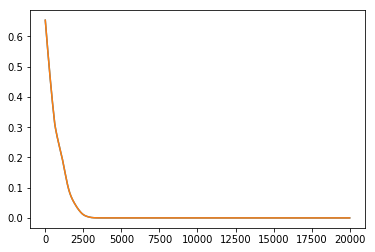

In [24]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [25]:
#list(enumerate(range(10)))

In [26]:
#print (rmse_a)

In [27]:
print (rmse_a[-1])

7.961344e-05


In [28]:
print (pred_list[-1])

IndexError: list index out of range